___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com)in 2019, contains many features of 9 different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project). You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import skew

from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv("final_scout_not_dummy.csv")

In [3]:
df.head()

body_type  price       km  make  hp_kW used_new upholstery_kind  door_count  \
0    Sedans  15770  56013.0  Audi   66.0     Used     not_leather         5.0   
1    Sedans  14500  80000.0  Audi  141.0     Used     not_leather         3.0   
2    Sedans  14640  83450.0  Audi   85.0     Used     not_leather         4.0   
3    Sedans  14500  73000.0  Audi   66.0     Used     not_leather         3.0   
4    Sedans  16790  16200.0  Audi   66.0     Used     not_leather         5.0   

   seat_count auto_manuel  co2_emission  gears  cylinders drive_chain  \
0         5.0   Automatic          99.0    5.0        3.0       front   
1         4.0   Automatic         129.0    7.0        4.0       front   
2         4.0   Automatic          99.0    5.0        3.0       front   
3         4.0   Automatic          99.0    6.0        3.0       front   
4         5.0   Automatic         109.0    5.0        3.0       front   

   weight_kg country_ver new_inspection  cc_from_description  \
0     1220.0     Germany            Yes                  1.4   
1     1255.0     Germany             No                  1.8   
2     1165.0     Germany             No                  1.6   
3     1195.0     Germany             No                  1.4   
4     1165.0     Germany            Yes                  1.4   

   consumption_comb model  age    fuel      high_comfort      rich_media  \
0               3.8    A1  3.0  diesel  not_high_comfort      rich_media   
1               5.6    A1  2.0     lpg  not_high_comfort      rich_media   
2               3.8    A1  3.0  diesel  not_high_comfort  not_rich_media   
3               3.8    A1  3.0  diesel  not_high_comfort      rich_media   
4               4.1    A1  3.0  diesel  not_high_comfort      rich_media   

  valuable_extra safety_selected warranty_12_months VAT_deductible  
0            yes             yes                 no            yes  
1            yes             yes                 no             no  
2            yes             yes                 no            yes  
3            yes             yes                 no             no  
4            yes             yes                 no             no

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15918 entries, 0 to 15917
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   body_type            15918 non-null  object 
 1   price                15918 non-null  int64  
 2   km                   15918 non-null  float64
 3   make                 15918 non-null  object 
 4   hp_kW                15918 non-null  float64
 5   used_new             15918 non-null  object 
 6   upholstery_kind      15918 non-null  object 
 7   door_count           15918 non-null  float64
 8   seat_count           15918 non-null  float64
 9   auto_manuel          15918 non-null  object 
 10  co2_emission         15918 non-null  float64
 11  gears                15918 non-null  float64
 12  cylinders            15918 non-null  float64
 13  drive_chain          15918 non-null  object 
 14  weight_kg            15918 non-null  float64
 15  country_ver          15918 non-null 

In [5]:
df.describe()

price             km         hp_kW    door_count    seat_count  \
count  15918.000000   15918.000000  15918.000000  15918.000000  15918.000000   
mean   18019.257193   33778.204809     88.196633      4.660761      4.952946   
std     7385.960648   36270.588749     25.577522      0.641300      0.474370   
min       13.000000       0.000000     51.000000      2.000000      2.000000   
25%    12850.000000    5797.750000     66.000000      4.000000      5.000000   
50%    16900.000000   24050.000000     85.000000      5.000000      5.000000   
75%    21900.000000   46899.250000    101.000000      5.000000      5.000000   
max    74600.000000  317000.000000    195.000000      5.000000      7.000000   

       co2_emission         gears     cylinders     weight_kg  \
count  15918.000000  15918.000000  15918.000000  15918.000000   
mean     118.310844      5.811974      3.813859   1340.729237   
std       17.429142      0.693821      0.389233    197.086585   
min       80.000000      5.000000      3.000000    840.000000   
25%      104.404514      5.000000      4.000000   1165.000000   
50%      115.332215      6.000000      4.000000   1342.000000   
75%      129.000000      6.000000      4.000000   1472.000000   
max      199.000000      9.000000      4.000000   2471.000000   

       cc_from_description  consumption_comb           age  
count         15918.000000      15918.000000  15918.000000  
mean              1.464254          4.790966      1.440319  
std               0.247478          0.906414      1.077939  
min               0.900000          3.000000      0.000000  
25%               1.400000          4.000000      1.000000  
50%               1.500000          4.700000      1.000000  
75%               1.600000          5.400000      2.000000  
max               2.800000         13.800000      3.000000

In [6]:
df.isnull().sum()

body_type              0
price                  0
km                     0
make                   0
hp_kW                  0
used_new               0
upholstery_kind        0
door_count             0
seat_count             0
auto_manuel            0
co2_emission           0
gears                  0
cylinders              0
drive_chain            0
weight_kg              0
country_ver            0
new_inspection         0
cc_from_description    0
consumption_comb       0
model                  0
age                    0
fuel                   0
high_comfort           0
rich_media             0
valuable_extra         0
safety_selected        0
warranty_12_months     0
VAT_deductible         0
dtype: int64

In [7]:
df_object = df.select_dtypes(include ="object").head()
df_object

body_type  make used_new upholstery_kind auto_manuel drive_chain  \
0    Sedans  Audi     Used     not_leather   Automatic       front   
1    Sedans  Audi     Used     not_leather   Automatic       front   
2    Sedans  Audi     Used     not_leather   Automatic       front   
3    Sedans  Audi     Used     not_leather   Automatic       front   
4    Sedans  Audi     Used     not_leather   Automatic       front   

  country_ver new_inspection model    fuel      high_comfort      rich_media  \
0     Germany            Yes    A1  diesel  not_high_comfort      rich_media   
1     Germany             No    A1     lpg  not_high_comfort      rich_media   
2     Germany             No    A1  diesel  not_high_comfort  not_rich_media   
3     Germany             No    A1  diesel  not_high_comfort      rich_media   
4     Germany            Yes    A1  diesel  not_high_comfort      rich_media   

  valuable_extra safety_selected warranty_12_months VAT_deductible  
0            yes             yes                 no            yes  
1            yes             yes                 no             no  
2            yes             yes                 no            yes  
3            yes             yes                 no             no  
4            yes             yes                 no             no

In [8]:
for col in df_object:
    print(f"{col:<20}:", df[col].nunique())

body_type           : 8
make                : 3
used_new            : 5
upholstery_kind     : 2
auto_manuel         : 2
drive_chain         : 3
country_ver         : 23
new_inspection      : 2
model               : 8
fuel                : 4
high_comfort        : 2
rich_media          : 2
valuable_extra      : 2
safety_selected     : 2
warranty_12_months  : 2
VAT_deductible      : 2


In [9]:
sns.histplot(df.price, bins=50, kde=True);

In [10]:
df_numeric = df.select_dtypes(include ="number")
df_numeric

price            km  hp_kW  door_count  seat_count  co2_emission  \
0      15770  56013.000000   66.0         5.0         5.0          99.0   
1      14500  80000.000000  141.0         3.0         4.0         129.0   
2      14640  83450.000000   85.0         4.0         4.0          99.0   
3      14500  73000.000000   66.0         3.0         4.0          99.0   
4      16790  16200.000000   66.0         5.0         5.0         109.0   
...      ...           ...    ...         ...         ...           ...   
15913  39950  33777.726625  147.0         5.0         5.0         139.0   
15914  39885   9900.000000  165.0         5.0         5.0         168.0   
15915  39875     15.000000  146.0         5.0         7.0         139.0   
15916  39700     10.000000  147.0         5.0         7.0         139.0   
15917  40999   2085.355137  165.0         5.0         5.0         153.0   

       gears  cylinders  weight_kg  cc_from_description  consumption_comb  age  
0        5.0        3.0     1220.0                  1.4               3.8  3.0  
1        7.0        4.0     1255.0                  1.8               5.6  2.0  
2        5.0        3.0     1165.0                  1.6               3.8  3.0  
3        6.0        3.0     1195.0                  1.4               3.8  3.0  
4        5.0        3.0     1165.0                  1.4               4.1  3.0  
...      ...        ...        ...                  ...               ...  ...  
15913    6.0        4.0     1758.0                  1.6               5.3  1.0  
15914    7.0        4.0     1708.0                  1.6               4.7  0.0  
15915    6.0        4.0     1734.0                  1.6               5.3  0.0  
15916    6.0        4.0     1758.0                  1.6               5.3  0.0  
15917    6.0        4.0     1685.0                  1.6               6.8  0.0  

[15918 rows x 12 columns]

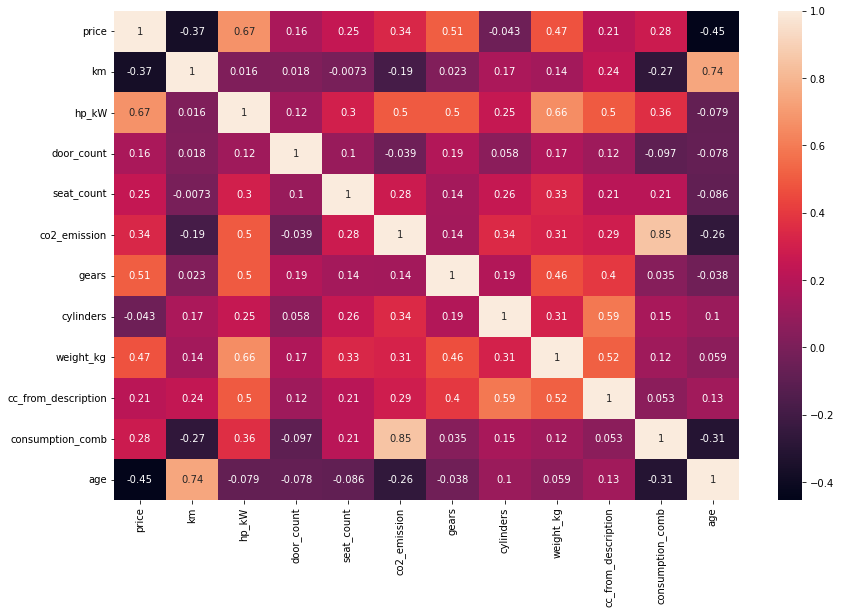

In [11]:
plt.figure(figsize=(14,9))
sns.heatmap(df_numeric.corr(), annot =True);

## multicollinearity control

In [12]:
df_numeric.corr()[(df_numeric.corr()>= 0.9) & (df_numeric.corr() < 1)].any()

price                  False
km                     False
hp_kW                  False
door_count             False
seat_count             False
co2_emission           False
gears                  False
cylinders              False
weight_kg              False
cc_from_description    False
consumption_comb       False
age                    False
dtype: bool

In [13]:
df_numeric.corr()[(df_numeric.corr()<= -0.9) & (df_numeric.corr() > -1)].any().any()

False

<AxesSubplot:xlabel='price'>

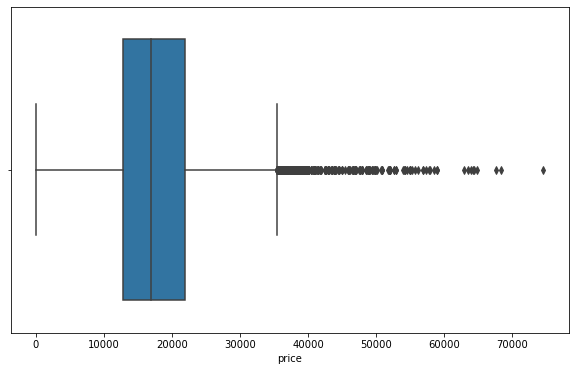

In [14]:
sns.boxplot(df.price)

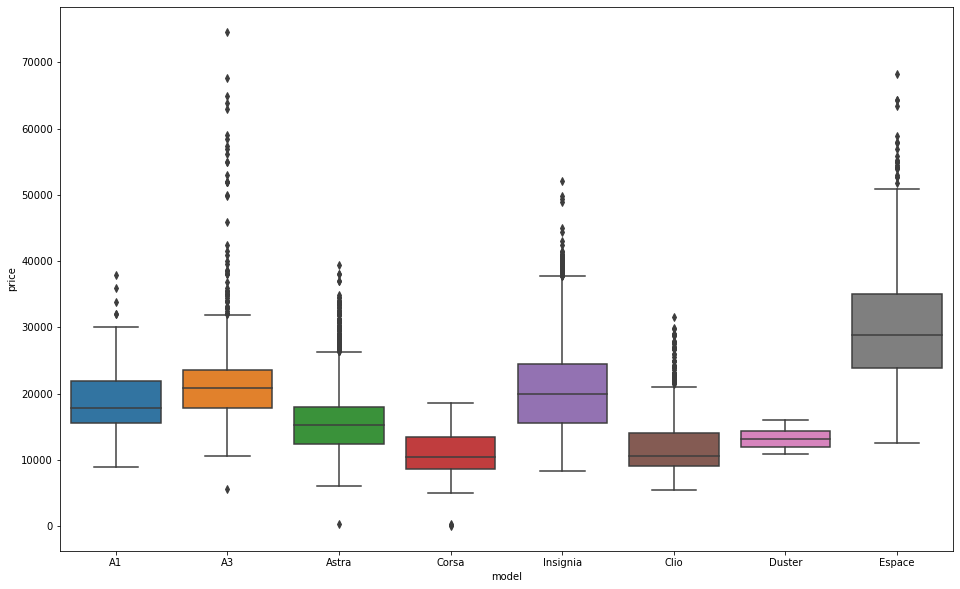

In [15]:
plt.figure(figsize=(16,10))
sns.boxplot(x="model", y="price", data=df, whis=1.5);

In [16]:
total_outliers = []

for model in df.model.unique():
    
    car_prices = df[df["model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    count_of_outliers = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).count()
    
    total_outliers.append(count_of_outliers)
    
    print(f" The count of outlier for {model:<15} : {count_of_outliers:<5}, \
          The rate of outliers : {(count_of_outliers/len(df[df['model']== model])).round(3)}")
print()    
print("Total_outliers : ",sum(total_outliers), "The rate of total outliers :", (sum(total_outliers)/len(df)).round(3))

# Her bir unique değerdeki outlier sayısı ve oranı

 The count of outlier for A1              : 5    ,           The rate of outliers : 0.002
 The count of outlier for A3              : 54   ,           The rate of outliers : 0.017
 The count of outlier for Astra           : 135  ,           The rate of outliers : 0.053
 The count of outlier for Corsa           : 3    ,           The rate of outliers : 0.001
 The count of outlier for Insignia        : 114  ,           The rate of outliers : 0.044
 The count of outlier for Clio            : 90   ,           The rate of outliers : 0.049
 The count of outlier for Duster          : 0    ,           The rate of outliers : 0.0
 The count of outlier for Espace          : 22   ,           The rate of outliers : 0.022

Total_outliers :  423 The rate of total outliers : 0.027


In [17]:
df["model"].value_counts()

A3          3097
A1          2614
Insignia    2598
Astra       2526
Corsa       2219
Clio        1839
Espace       991
Duster        34
Name: model, dtype: int64

# Dropping outliers in price.

In [18]:
drop_index_list = []

for model in df.model.unique():
    
    car_prices = df[df["model"]== model]["price"]
    
    Q1 = car_prices.quantile(0.25)
    Q3 = car_prices.quantile(0.75)
    IQR = Q3-Q1
    lower_lim = Q1-1.5*IQR
    upper_lim = Q3+1.5*IQR
    
    outlier_index = (car_prices[(car_prices < lower_lim) | (car_prices > upper_lim)]).index.values
    for i in outlier_index:
        drop_index_list.append(i)

In [19]:
len(drop_index_list)

423

In [20]:
df.drop(index=drop_index_list, inplace=True)

In [21]:
plt.figure(figsize=(16,10))
sns.boxplot(data=df, x="model", y="price", whis=1.5);

In [22]:
df.shape

(15495, 28)

In [23]:
15495 + 423

15918

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [24]:
X= df.drop(columns="price")
y= df.price

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## OneHotEncoder

In [26]:
# Kategorik sütunumuz olduğu zaman onehotencoder yapacağız
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
# sparse=False : Bir dizi dönsün istiyorum
# sparse=True  : Matris dönüyor
# handle_unknown="ignore": Birazdan açıklanacak

In [27]:
cat = X_train.select_dtypes("object").columns
cat
 # train üzerinden onehotencoder yapacağız. O yüzden traindeki kategorik sütunları çağırıyoruz

Index(['body_type', 'make', 'used_new', 'upholstery_kind', 'auto_manuel',
       'drive_chain', 'country_ver', 'new_inspection', 'model', 'fuel',
       'high_comfort', 'rich_media', 'valuable_extra', 'safety_selected',
       'warranty_12_months', 'VAT_deductible'],
      dtype='object')

In [28]:
cat = list(cat) # Bunları listeye çevirelim
cat 

['body_type',
 'make',
 'used_new',
 'upholstery_kind',
 'auto_manuel',
 'drive_chain',
 'country_ver',
 'new_inspection',
 'model',
 'fuel',
 'high_comfort',
 'rich_media',
 'valuable_extra',
 'safety_selected',
 'warranty_12_months',
 'VAT_deductible']

In [29]:
enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
# OneHotEncoder fonk. kullanalım
# enc.fit_transform(X_train[cat] : encoder tanımlayıp fit_transfotm yapıyorum
# index = X_train.index : sıra karışmasın diye train in indexsini veriyoruz

In [30]:
enc.fit_transform(X_train[cat])

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [31]:
enc.get_feature_names_out(cat)  # column isimleri başa geldi

array(['body_type_Compact', 'body_type_Convertible', 'body_type_Coupe',
       'body_type_Off-Road', 'body_type_Sedans',
       'body_type_Station wagon', 'body_type_Transporter',
       'body_type_Van', 'make_Audi', 'make_Opel', 'make_Renault',
       'used_new_Demonstration', "used_new_Employee's car",
       'used_new_New', 'used_new_Pre-registered', 'used_new_Used',
       'upholstery_kind_leather', 'upholstery_kind_not_leather',
       'auto_manuel_Automatic', 'auto_manuel_Manuel', 'drive_chain_4WD',
       'drive_chain_front', 'drive_chain_rear', 'country_ver_Austria',
       'country_ver_Belgium', 'country_ver_Bulgaria',
       'country_ver_Croatia', 'country_ver_Czech Republic',
       'country_ver_Denmark', 'country_ver_Egypt',
       'country_ver_European Union', 'country_ver_France',
       'country_ver_Germany', 'country_ver_Hungary', 'country_ver_Italy',
       'country_ver_Japan', 'country_ver_Luxembourg',
       'country_ver_Netherlands', 'country_ver_Poland',
       'co

In [32]:
X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
X_train_cat
# One hot encoder yapılmış halini görüyoruz
# Orion Hoca: Onehotencoder : trainden öğrenip test e onu uygulayabiliyor. get_dummy de böyle bir şey yok. Yani;
# .. get_dummy de transform yapılamıyor

body_type_Compact  body_type_Convertible  body_type_Coupe  \
10063                1.0                    0.0              0.0   
3436                 0.0                    0.0              0.0   
3815                 0.0                    0.0              0.0   
103                  0.0                    0.0              0.0   
9950                 1.0                    0.0              0.0   
...                  ...                    ...              ...   
5754                 0.0                    0.0              0.0   
8200                 0.0                    0.0              0.0   
1366                 0.0                    0.0              0.0   
1552                 0.0                    0.0              0.0   
13462                0.0                    0.0              0.0   

       body_type_Off-Road  body_type_Sedans  body_type_Station wagon  \
10063                 0.0               0.0                      0.0   
3436                  0.0               1.0                      0.0   
3815                  0.0               1.0                      0.0   
103                   0.0               1.0                      0.0   
9950                  0.0               0.0                      0.0   
...                   ...               ...                      ...   
5754                  0.0               0.0                      1.0   
8200                  0.0               0.0                      1.0   
1366                  0.0               1.0                      0.0   
1552                  0.0               1.0                      0.0   
13462                 0.0               0.0                      1.0   

       body_type_Transporter  body_type_Van  make_Audi  make_Opel  \
10063                    0.0            0.0        0.0        1.0   
3436                     0.0            0.0        1.0        0.0   
3815                     0.0            0.0        1.0        0.0   
103                      0.0            0.0        1.0        0.0   
9950                     0.0            0.0        0.0        1.0   
...                      ...            ...        ...        ...   
5754                     0.0            0.0        0.0        1.0   
8200                     0.0            0.0        0.0        1.0   
1366                     0.0            0.0        1.0        0.0   
1552                     0.0            0.0        1.0        0.0   
13462                    0.0            0.0        0.0        0.0   

       make_Renault  used_new_Demonstration  used_new_Employee's car  \
10063           0.0                     0.0                      0.0   
3436            0.0                     0.0                      0.0   
3815            0.0                     0.0                      0.0   
103             0.0                     0.0                      0.0   
9950            0.0                     0.0                      0.0   
...             ...                     ...                      ...   
5754            0.0                     0.0                      0.0   
8200            0.0                     1.0                      0.0   
1366            0.0                     0.0                      0.0   
1552            0.0                     0.0                      0.0   
13462           1.0                     0.0                      0.0   

       used_new_New  used_new_Pre-registered  used_new_Used  \
10063           0.0                      1.0            0.0   
3436            0.0                      0.0            1.0   
3815            0.0                      0.0            1.0   
103             0.0                      0.0            1.0   
9950            0.0                      1.0            0.0   
...             ...                      ...            ...   
5754            0.0                      0.0            1.0   
8200            0.0                      0.0            0.0   
1366            0.0                      0.0            1.0   
1

In [33]:
X_train.select_dtypes("number") # Nümerik featurelarımız

km  hp_kW  door_count  seat_count  co2_emission  gears  cylinders  \
10063     10.0   66.0         4.0         5.0    143.000000    5.0        4.0   
3436   54000.0   81.0         5.0         5.0     99.000000    7.0        4.0   
3815   39246.0  110.0         4.0         5.0    114.000000    7.0        4.0   
103     9082.0   85.0         5.0         5.0    105.000000    7.0        4.0   
9950      10.0   66.0         5.0         5.0    143.000000    6.0        4.0   
...        ...    ...         ...         ...           ...    ...        ...   
5754   47000.0  100.0         5.0         5.0    115.332215    6.0        4.0   
8200      10.0   77.0         5.0         5.0    107.000000    5.0        4.0   
1366   26650.0   70.0         2.0         4.0     97.000000    5.0        3.0   
1552   15577.0   70.0         5.0         5.0     98.000000    5.0        3.0   
13462  49178.0   54.0         4.0         5.0    126.000000    5.0        4.0   

       weight_kg  cc_from_description  consumption_comb  age  
10063     1163.0                  1.4               6.3  0.0  
3436      1360.0                  1.6               3.8  3.0  
3815      1245.0                  1.4               5.0  2.0  
103       1275.0                  1.6               4.0  1.0  
9950      1163.0                  1.4               6.3  0.0  
...          ...                  ...               ...  ...  
5754      1273.0                  1.6               4.0  1.0  
8200      1247.0                  1.6               4.6  0.0  
1366      1165.0                  1.0               4.2  1.0  
1552      1580.0                  1.0               4.3  1.0  
13462     1165.0                  1.2               5.4  3.0  

[12396 rows x 11 columns]

In [34]:
X_train_new = X_train_cat.join(X_train.select_dtypes("number"))
X_train_new # x_train kategorikleri ile  x_train nümeriklerini birleştirdik
# X_train datamız oluştu. Bunu test içinde yapacağız

body_type_Compact  body_type_Convertible  body_type_Coupe  \
10063                1.0                    0.0              0.0   
3436                 0.0                    0.0              0.0   
3815                 0.0                    0.0              0.0   
103                  0.0                    0.0              0.0   
9950                 1.0                    0.0              0.0   
...                  ...                    ...              ...   
5754                 0.0                    0.0              0.0   
8200                 0.0                    0.0              0.0   
1366                 0.0                    0.0              0.0   
1552                 0.0                    0.0              0.0   
13462                0.0                    0.0              0.0   

       body_type_Off-Road  body_type_Sedans  body_type_Station wagon  \
10063                 0.0               0.0                      0.0   
3436                  0.0               1.0                      0.0   
3815                  0.0               1.0                      0.0   
103                   0.0               1.0                      0.0   
9950                  0.0               0.0                      0.0   
...                   ...               ...                      ...   
5754                  0.0               0.0                      1.0   
8200                  0.0               0.0                      1.0   
1366                  0.0               1.0                      0.0   
1552                  0.0               1.0                      0.0   
13462                 0.0               0.0                      1.0   

       body_type_Transporter  body_type_Van  make_Audi  make_Opel  \
10063                    0.0            0.0        0.0        1.0   
3436                     0.0            0.0        1.0        0.0   
3815                     0.0            0.0        1.0        0.0   
103                      0.0            0.0        1.0        0.0   
9950                     0.0            0.0        0.0        1.0   
...                      ...            ...        ...        ...   
5754                     0.0            0.0        0.0        1.0   
8200                     0.0            0.0        0.0        1.0   
1366                     0.0            0.0        1.0        0.0   
1552                     0.0            0.0        1.0        0.0   
13462                    0.0            0.0        0.0        0.0   

       make_Renault  used_new_Demonstration  used_new_Employee's car  \
10063           0.0                     0.0                      0.0   
3436            0.0                     0.0                      0.0   
3815            0.0                     0.0                      0.0   
103             0.0                     0.0                      0.0   
9950            0.0                     0.0                      0.0   
...             ...                     ...                      ...   
5754            0.0                     0.0                      0.0   
8200            0.0                     1.0                      0.0   
1366            0.0                     0.0                      0.0   
1552            0.0                     0.0                      0.0   
13462           1.0                     0.0                      0.0   

       used_new_New  used_new_Pre-registered  used_new_Used  \
10063           0.0                      1.0            0.0   
3436            0.0                      0.0            1.0   
3815            0.0                      0.0            1.0   
103             0.0                      0.0            1.0   
9950            0.0                      1.0            0.0   
...             ...                      ...            ...   
5754            0.0                      0.0            1.0   
8200            0.0                      0.0            0.0   
1366            0.0                      0.0            1.0   
1

In [35]:
X_test_cat = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, columns = enc.get_feature_names_out(cat))
X_test_cat
# Encoder ı transform olarak çağırıyoruz burada(enc.transform(X_test[cat])
# Sonuç olarak Data leakage in önüne geçmiş olduk

body_type_Compact  body_type_Convertible  body_type_Coupe  \
9821                 0.0                    0.0              0.0   
14585                0.0                    0.0              0.0   
13230                0.0                    0.0              0.0   
6508                 0.0                    0.0              0.0   
1477                 0.0                    0.0              0.0   
...                  ...                    ...              ...   
7423                 0.0                    0.0              0.0   
4401                 0.0                    0.0              0.0   
551                  0.0                    0.0              0.0   
10644                0.0                    0.0              0.0   
3501                 0.0                    0.0              0.0   

       body_type_Off-Road  body_type_Sedans  body_type_Station wagon  \
9821                  0.0               1.0                      0.0   
14585                 0.0               1.0                      0.0   
13230                 0.0               0.0                      1.0   
6508                  0.0               0.0                      1.0   
1477                  0.0               1.0                      0.0   
...                   ...               ...                      ...   
7423                  0.0               0.0                      1.0   
4401                  0.0               1.0                      0.0   
551                   0.0               1.0                      0.0   
10644                 0.0               0.0                      1.0   
3501                  0.0               0.0                      1.0   

       body_type_Transporter  body_type_Van  make_Audi  make_Opel  \
9821                     0.0            0.0        0.0        1.0   
14585                    0.0            0.0        0.0        0.0   
13230                    0.0            0.0        0.0        0.0   
6508                     0.0            0.0        0.0        1.0   
1477                     0.0            0.0        1.0        0.0   
...                      ...            ...        ...        ...   
7423                     0.0            0.0        0.0        1.0   
4401                     0.0            0.0        1.0        0.0   
551                      0.0            0.0        1.0        0.0   
10644                    0.0            0.0        0.0        1.0   
3501                     0.0            0.0        1.0        0.0   

       make_Renault  used_new_Demonstration  used_new_Employee's car  \
9821            0.0                     0.0                      0.0   
14585           1.0                     0.0                      1.0   
13230           1.0                     0.0                      0.0   
6508            0.0                     0.0                      0.0   
1477            0.0                     0.0                      0.0   
...             ...                     ...                      ...   
7423            0.0                     0.0                      0.0   
4401            0.0                     0.0                      0.0   
551             0.0                     0.0                      0.0   
10644           0.0                     0.0                      0.0   
3501            0.0                     0.0                      0.0   

       used_new_New  used_new_Pre-registered  used_new_Used  \
9821            0.0                      0.0            1.0   
14585           0.0                      0.0            0.0   
13230           0.0                      0.0            1.0   
6508            0.0                      0.0            1.0   
1477            0.0                      0.0            1.0   
...             ...                      ...            ...   
7423            0.0                      0.0            1.0   
4401            0.0                      0.0            1.0   
551             0.0                      0.0            1.0   
1

In [36]:
X_test.select_dtypes("number") # X_test nümerik sütunlar

km  hp_kW  door_count  seat_count  co2_emission  gears  cylinders  \
9821   24487.0   51.0         5.0         5.0    126.000000    5.0        4.0   
14585    500.0   56.0         5.0         5.0    119.000000    5.0        3.0   
13230  24473.0   87.0         5.0         5.0    120.000000    5.0        4.0   
6508   70000.0   81.0         5.0         5.0     97.000000    6.0        4.0   
1477   24336.0   70.0         5.0         5.0     98.000000    5.0        3.0   
...        ...    ...         ...         ...           ...    ...        ...   
7423   11500.0   77.0         5.0         5.0    115.332215    5.0        4.0   
4401   14270.0   85.0         4.0         5.0    105.000000    7.0        4.0   
551    57000.0   66.0         5.0         4.0     91.000000    5.0        3.0   
10644  94220.0  101.0         5.0         5.0    135.230696    6.0        4.0   
3501   89812.0   81.0         5.0         5.0     88.000000    6.0        4.0   

       weight_kg  cc_from_description  consumption_comb  age  
9821      1163.0                  1.2               5.4  1.0  
14585     1165.0                  1.5               5.0  0.0  
13230     1270.0                  1.5               5.4  1.0  
6508      1613.0                  1.6               3.7  3.0  
1477      1580.0                  1.0               4.3  1.0  
...          ...                  ...               ...  ...  
7423      1350.0                  1.0               4.5  1.0  
4401      1840.0                  1.6               4.0  1.0  
551       1195.0                  1.4               3.7  3.0  
10644     1503.0                  1.6               5.7  3.0  
3501      1315.0                  1.6               3.3  3.0  

[3099 rows x 11 columns]

In [37]:
X_test_new = X_test_cat.join(X_test.select_dtypes("number"))
X_test_new 
# # X_test kategorik ve nümerik sütunlarını birleştiriyoruz
# Test datamızda oluştu

body_type_Compact  body_type_Convertible  body_type_Coupe  \
9821                 0.0                    0.0              0.0   
14585                0.0                    0.0              0.0   
13230                0.0                    0.0              0.0   
6508                 0.0                    0.0              0.0   
1477                 0.0                    0.0              0.0   
...                  ...                    ...              ...   
7423                 0.0                    0.0              0.0   
4401                 0.0                    0.0              0.0   
551                  0.0                    0.0              0.0   
10644                0.0                    0.0              0.0   
3501                 0.0                    0.0              0.0   

       body_type_Off-Road  body_type_Sedans  body_type_Station wagon  \
9821                  0.0               1.0                      0.0   
14585                 0.0               1.0                      0.0   
13230                 0.0               0.0                      1.0   
6508                  0.0               0.0                      1.0   
1477                  0.0               1.0                      0.0   
...                   ...               ...                      ...   
7423                  0.0               0.0                      1.0   
4401                  0.0               1.0                      0.0   
551                   0.0               1.0                      0.0   
10644                 0.0               0.0                      1.0   
3501                  0.0               0.0                      1.0   

       body_type_Transporter  body_type_Van  make_Audi  make_Opel  \
9821                     0.0            0.0        0.0        1.0   
14585                    0.0            0.0        0.0        0.0   
13230                    0.0            0.0        0.0        0.0   
6508                     0.0            0.0        0.0        1.0   
1477                     0.0            0.0        1.0        0.0   
...                      ...            ...        ...        ...   
7423                     0.0            0.0        0.0        1.0   
4401                     0.0            0.0        1.0        0.0   
551                      0.0            0.0        1.0        0.0   
10644                    0.0            0.0        0.0        1.0   
3501                     0.0            0.0        1.0        0.0   

       make_Renault  used_new_Demonstration  used_new_Employee's car  \
9821            0.0                     0.0                      0.0   
14585           1.0                     0.0                      1.0   
13230           1.0                     0.0                      0.0   
6508            0.0                     0.0                      0.0   
1477            0.0                     0.0                      0.0   
...             ...                     ...                      ...   
7423            0.0                     0.0                      0.0   
4401            0.0                     0.0                      0.0   
551             0.0                     0.0                      0.0   
10644           0.0                     0.0                      0.0   
3501            0.0                     0.0                      0.0   

       used_new_New  used_new_Pre-registered  used_new_Used  \
9821            0.0                      0.0            1.0   
14585           0.0                      0.0            0.0   
13230           0.0                      0.0            1.0   
6508            0.0                      0.0            1.0   
1477            0.0                      0.0            1.0   
...             ...                      ...            ...   
7423            0.0                      0.0            1.0   
4401            0.0                      0.0            1.0   
551             0.0                      0.0            1.0   
1

In [38]:
# Yukarda uzun uzun yaptığımız şeyi altta fonksiyona aktaralım

In [39]:
def trans_OneHotEncoder(X_train, X_test):
    
    cat = X_train.select_dtypes("object").columns
    cat = list(cat)
    
    enc = OneHotEncoder(handle_unknown="ignore", sparse=False)
    
    X_train_cat = pd.DataFrame(enc.fit_transform(X_train[cat]), index = X_train.index, 
                           columns = enc.get_feature_names_out(cat))
    
    X_test_cat  = pd.DataFrame(enc.transform(X_test[cat]), index = X_test.index, 
                               columns = enc.get_feature_names_out(cat))
    
    X_train = X_train_cat.join(X_train.select_dtypes("number"))
    X_test = X_test_cat.join(X_test.select_dtypes("number"))
    
    
    return X_train, X_test

In [40]:
X_train, X_test = trans_OneHotEncoder(X_train, X_test) 
# Tek satırda X_train ve X_test onehotencoder uygulanmış datam döndü

In [41]:
X_train.head()

body_type_Compact  body_type_Convertible  body_type_Coupe  \
10063                1.0                    0.0              0.0   
3436                 0.0                    0.0              0.0   
3815                 0.0                    0.0              0.0   
103                  0.0                    0.0              0.0   
9950                 1.0                    0.0              0.0   

       body_type_Off-Road  body_type_Sedans  body_type_Station wagon  \
10063                 0.0               0.0                      0.0   
3436                  0.0               1.0                      0.0   
3815                  0.0               1.0                      0.0   
103                   0.0               1.0                      0.0   
9950                  0.0               0.0                      0.0   

       body_type_Transporter  body_type_Van  make_Audi  make_Opel  \
10063                    0.0            0.0        0.0        1.0   
3436                     0.0            0.0        1.0        0.0   
3815                     0.0            0.0        1.0        0.0   
103                      0.0            0.0        1.0        0.0   
9950                     0.0            0.0        0.0        1.0   

       make_Renault  used_new_Demonstration  used_new_Employee's car  \
10063           0.0                     0.0                      0.0   
3436            0.0                     0.0                      0.0   
3815            0.0                     0.0                      0.0   
103             0.0                     0.0                      0.0   
9950            0.0                     0.0                      0.0   

       used_new_New  used_new_Pre-registered  used_new_Used  \
10063           0.0                      1.0            0.0   
3436            0.0                      0.0            1.0   
3815            0.0                      0.0            1.0   
103             0.0                      0.0            1.0   
9950            0.0                      1.0            0.0   

       upholstery_kind_leather  upholstery_kind_not_leather  \
10063                      0.0                          1.0   
3436                       0.0                          1.0   
3815                       0.0                          1.0   
103                        0.0                          1.0   
9950                       0.0                          1.0   

       auto_manuel_Automatic  auto_manuel_Manuel  drive_chain_4WD  \
10063                    1.0                 0.0              0.0   
3436                     0.0                 1.0              0.0   
3815                     1.0                 0.0              0.0   
103                      1.0                 0.0              0.0   
9950                     1.0                 0.0              0.0   

       drive_chain_front  drive_chain_rear  country_ver_Austria  \
10063                1.0               0.0                  0.0   
3436                 1.0               0.0                  0.0   
3815                 1.0               0.0                  0.0   
103                  1.0               0.0                  0.0   
9950                 1.0               0.0                  0.0   

       country_ver_Belgium  country_ver_Bulgaria  country_ver_Croatia  \
10063                  0.0                   0.0                  0.0   
3436                   0.0                   0.0                  0.0   
3815                   1.0                   0.0                  0.0   
103                    0.0                   0.0                  0.0   
9950                   0.0                   0.0                  0.0   

       country_ver_Czech Republic  country_ver_Denmark  country_ver_Egypt  \
10063                         0.0                  0.0                0.0   
3436                          0.0                  0.0                0.0   
3815                          0.0                  0.0                0

In [42]:
X_test.head()

body_type_Compact  body_type_Convertible  body_type_Coupe  \
9821                 0.0                    0.0              0.0   
14585                0.0                    0.0              0.0   
13230                0.0                    0.0              0.0   
6508                 0.0                    0.0              0.0   
1477                 0.0                    0.0              0.0   

       body_type_Off-Road  body_type_Sedans  body_type_Station wagon  \
9821                  0.0               1.0                      0.0   
14585                 0.0               1.0                      0.0   
13230                 0.0               0.0                      1.0   
6508                  0.0               0.0                      1.0   
1477                  0.0               1.0                      0.0   

       body_type_Transporter  body_type_Van  make_Audi  make_Opel  \
9821                     0.0            0.0        0.0        1.0   
14585                    0.0            0.0        0.0        0.0   
13230                    0.0            0.0        0.0        0.0   
6508                     0.0            0.0        0.0        1.0   
1477                     0.0            0.0        1.0        0.0   

       make_Renault  used_new_Demonstration  used_new_Employee's car  \
9821            0.0                     0.0                      0.0   
14585           1.0                     0.0                      1.0   
13230           1.0                     0.0                      0.0   
6508            0.0                     0.0                      0.0   
1477            0.0                     0.0                      0.0   

       used_new_New  used_new_Pre-registered  used_new_Used  \
9821            0.0                      0.0            1.0   
14585           0.0                      0.0            0.0   
13230           0.0                      0.0            1.0   
6508            0.0                      0.0            1.0   
1477            0.0                      0.0            1.0   

       upholstery_kind_leather  upholstery_kind_not_leather  \
9821                       0.0                          1.0   
14585                      0.0                          1.0   
13230                      0.0                          1.0   
6508                       0.0                          1.0   
1477                       0.0                          1.0   

       auto_manuel_Automatic  auto_manuel_Manuel  drive_chain_4WD  \
9821                     0.0                 1.0              0.0   
14585                    0.0                 1.0              0.0   
13230                    1.0                 0.0              0.0   
6508                     0.0                 1.0              0.0   
1477                     0.0                 1.0              0.0   

       drive_chain_front  drive_chain_rear  country_ver_Austria  \
9821                 1.0               0.0                  0.0   
14585                1.0               0.0                  0.0   
13230                1.0               0.0                  0.0   
6508                 1.0               0.0                  0.0   
1477                 1.0               0.0                  0.0   

       country_ver_Belgium  country_ver_Bulgaria  country_ver_Croatia  \
9821                   0.0                   0.0                  0.0   
14585                  0.0                   0.0                  0.0   
13230                  0.0                   0.0                  0.0   
6508                   0.0                   0.0                  0.0   
1477                   0.0                   0.0                  0.0   

       country_ver_Czech Republic  country_ver_Denmark  country_ver_Egypt  \
9821                          0.0                  0.0                0.0   
14585                         0.0                  0.0                0.0   
13230                         0.0                  0.0                0

In [43]:
corr_by_price = X_train.join(y_train).corr()["price"].sort_values()[:-1]
corr_by_price

age                             -0.441100
auto_manuel_Manuel              -0.411455
model_Corsa                     -0.391610
km                              -0.368113
used_new_Used                   -0.351529
model_Clio                      -0.331872
upholstery_kind_not_leather     -0.318565
high_comfort_not_high_comfort   -0.274347
make_Opel                       -0.247828
body_type_Compact               -0.213632
model_Astra                     -0.158084
VAT_deductible_no               -0.134669
fuel_lpg                        -0.118451
drive_chain_front               -0.111445
rich_media_not_rich_media       -0.098837
cylinders                       -0.073925
country_ver_Germany             -0.066356
country_ver_Spain               -0.052411
safety_selected_no              -0.046713
valuable_extra_no               -0.045920
body_type_Sedans                -0.037335
warranty_12_months_yes          -0.034244
model_Duster                    -0.027017
country_ver_Japan               -0

NameError: name 'container' is not defined

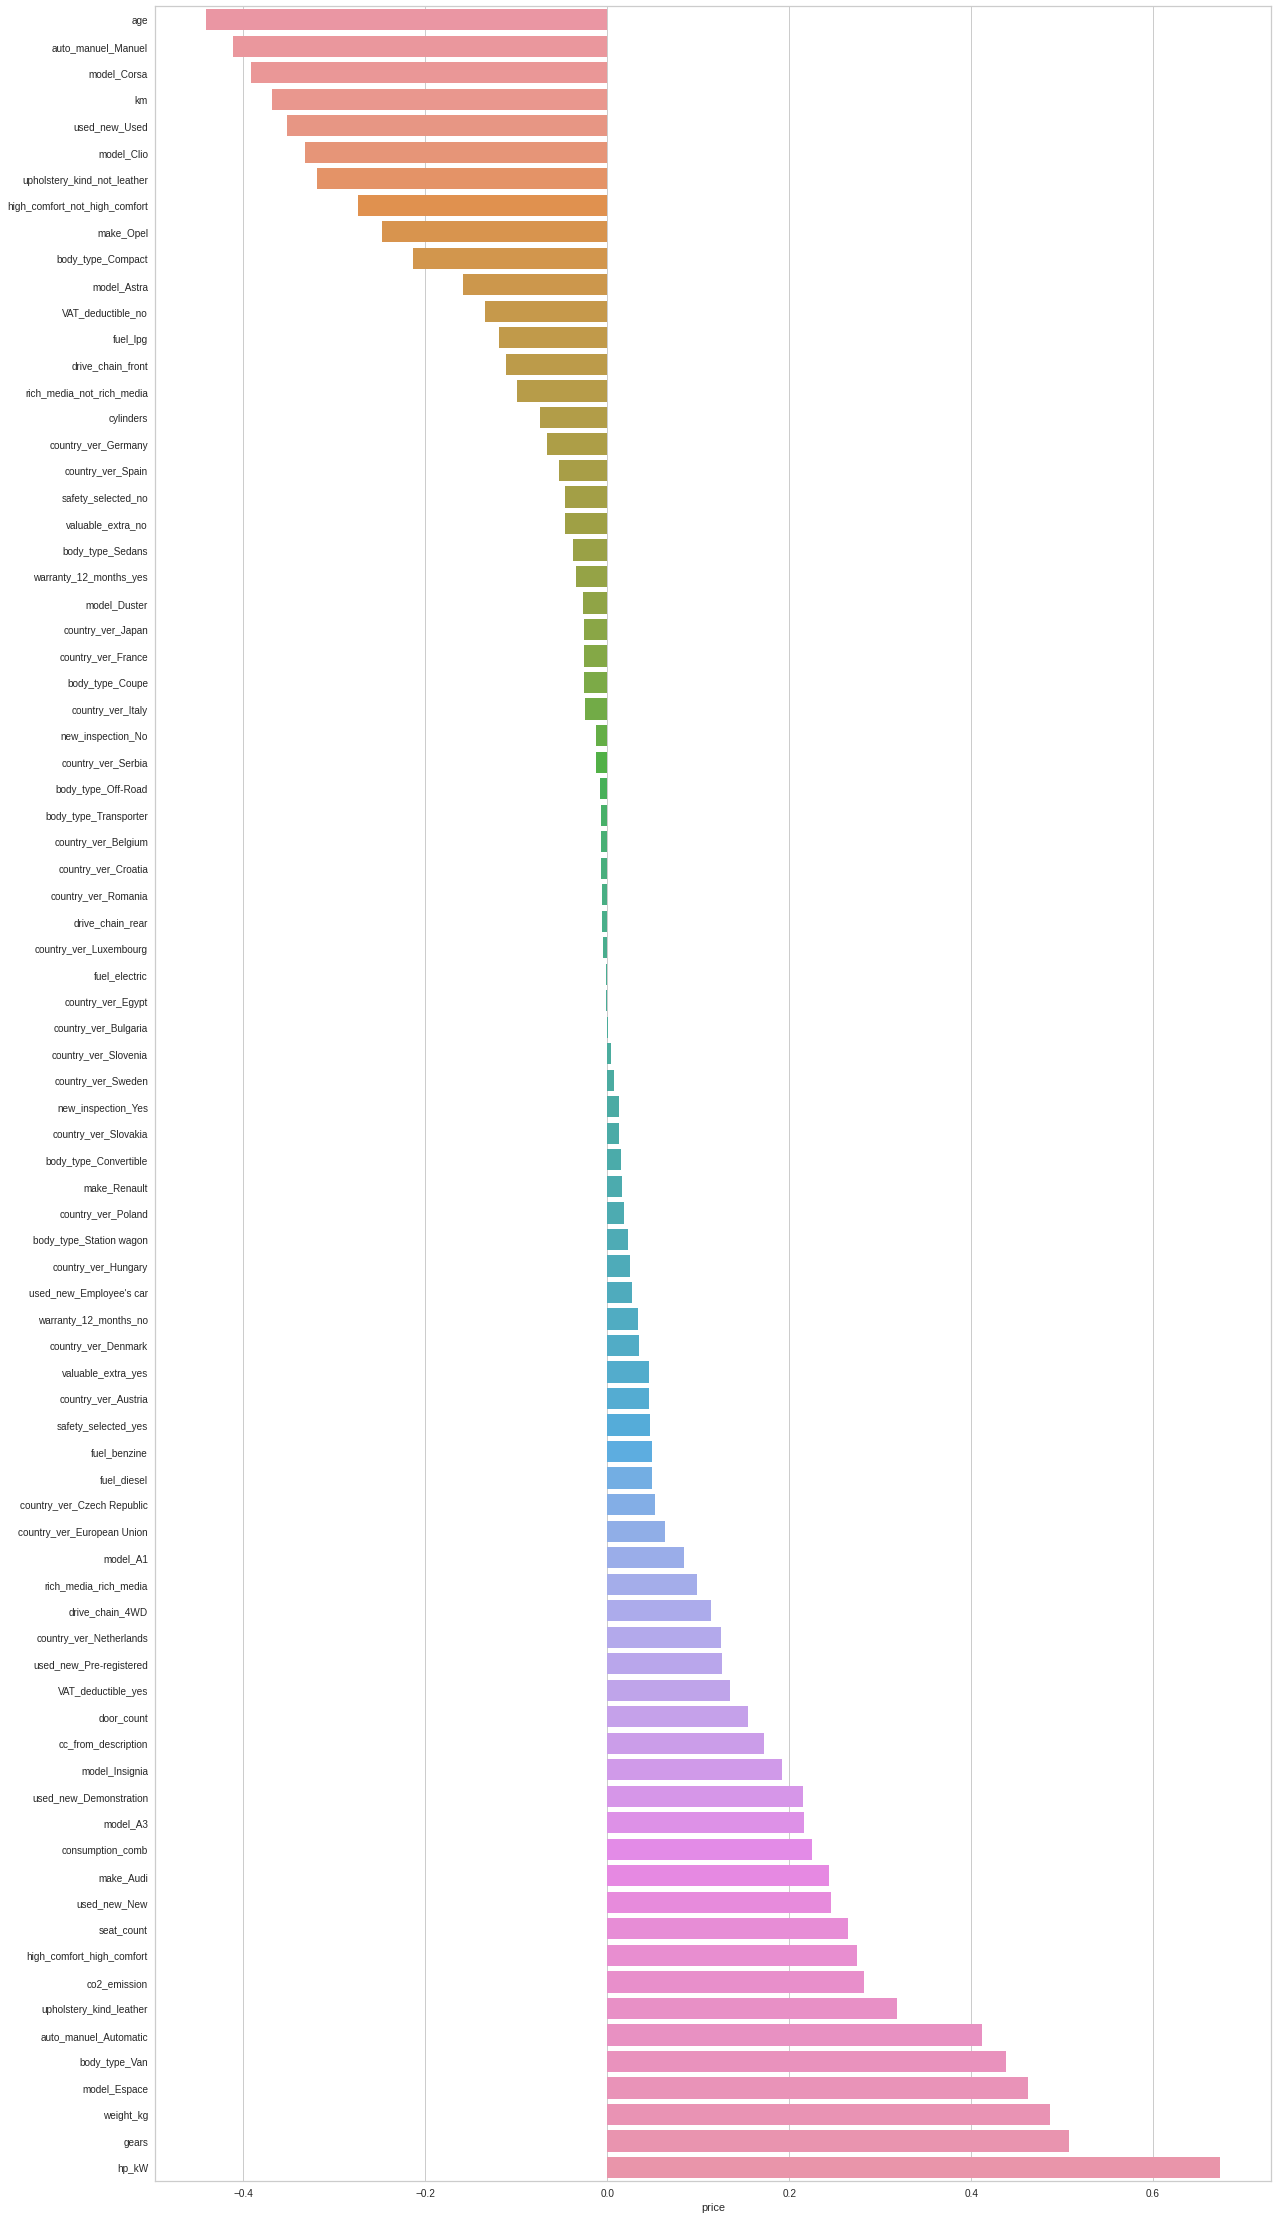

In [67]:
# Üstteki corr bilgisini görselleştirelim
plt.figure(figsize = (20,40))
sns.barplot(y = corr_by_price.index, x = corr_by_price).bar_label(container)
plt.show()

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [45]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [46]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
pd.options.display.float_format = '{:.3f}'.format # Sonuçlarda virgülden sonra 3 hane gelmesi için kod
# Environment settings: 
    # pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [48]:
train_val(lm, X_train, y_train, X_test, y_test)
# Skorlar tutarlı görünüyor
# Ama 150 feature ımız var artık. O yüzden adjusted_r2 ye bakıyoruz
# Acaba skorlarımız gerçek mi değil mi diye

train        test
R2         0.888       0.884
mae     1626.999    1597.933
mse  5210009.306 4944723.224
rmse    2282.544    2223.673

## Adjusted R2 Score

In [50]:
def adj_r2(y_test, y_pred, X):
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [51]:
y_pred = lm.predict(X_test)

In [52]:
adj_r2(y_test, y_pred, X) # Karşılaştırdığımızda skorlarımız tutarlı
# Yani artan feature sayımı datam kaldırabiliyor

0.8836396806443134

## Cross Validate

In [53]:
model = LinearRegression() # normalize=True
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)
# CV yi Test skorumuzu teyit etmek için yapıyorduk...
# model = LinearRegression(normalize=True) : min, max değerlerine göre scale ediyor
# scores = cross_validate(model, X_train, y_train, scoring=['r2', 
#            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10, return_train_score=True)

In [54]:
pd.DataFrame(scores)

fit_time  score_time  test_r2  test_neg_mean_absolute_error  \
0     0.064       0.010    0.879                     -1619.118   
1     0.048       0.004    0.892                     -1623.859   
2     0.043       0.004    0.887                     -1663.382   
3     0.036       0.004    0.888                     -1637.662   
4     0.034       0.004    0.878                     -1668.975   
5     0.033       0.004    0.888                     -1693.096   
6     0.035       0.004    0.890                     -1605.529   
7     0.034       0.004    0.886                     -1636.090   
8     0.035       0.004    0.888                     -1577.477   
9     0.034       0.004    0.888                     -1650.373   

   test_neg_mean_squared_error  test_neg_root_mean_squared_error  
0                 -5126458.316                         -2264.168  
1                 -4953235.500                         -2225.587  
2                 -5502955.378                         -2345.838  
3                 -5388904.969                         -2321.402  
4                 -5659167.654                         -2378.901  
5                 -5597532.215                         -2365.910  
6                 -4860183.043                         -2204.582  
7                 -5576364.386                         -2361.433  
8                 -5119820.620                         -2262.702  
9                 -5074942.093                         -2252.763

In [55]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                   0.886
test_neg_mean_absolute_error          -1637.556
test_neg_mean_squared_error        -5285956.417
test_neg_root_mean_squared_error      -2298.329
dtype: float64

In [56]:
train_val(lm, X_train, y_train, X_test, y_test) # Skorlarımız tutarlı görünüyor

train        test
R2         0.888       0.884
mae     1626.999    1597.933
mse  5210009.306 4944723.224
rmse    2282.544    2223.673

In [57]:
2223/df.price.mean() # Hatalarımızın oransal değeri. price ı yüzde 13 hata ile tahmin edebiliyoruz

0.12646228296765938

## Prediction Error

In [58]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

## Residual Plot

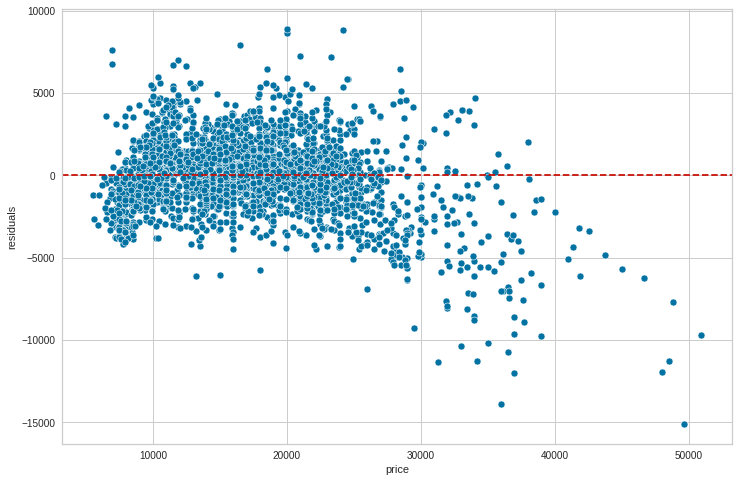

In [59]:
plt.figure(figsize=(12,8))
residuals = y_test-y_pred

sns.scatterplot(x = y_test, y = -residuals) #-residuals
plt.axhline(y = 0, color ="r", linestyle = "--")
plt.ylabel("residuals")
plt.show()
# Hatalarımızın dağımında normal dağılım olduğunu görüyoruz genelde
# Tam anlaşılması için kdeplot a bakalım

<AxesSubplot:xlabel='price', ylabel='Density'>

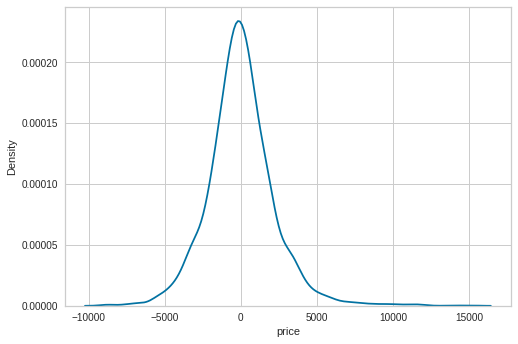

In [60]:
sns.kdeplot(residuals) # Normal dağılım olduğunu görüyoruz

In [61]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();       
# Burada da genel anlamda normal dağılım olduğunu görüyoruz Train ve test in

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Scaling

In [62]:
scaler = MinMaxScaler()   # dummy featurelar çok olduğu için MinMaxScaler() kullanmak mantıklı
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Ridge

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [63]:
from sklearn.linear_model import Ridge

In [64]:
ridge_model = Ridge()

In [65]:
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [66]:
train_val(ridge_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.888       0.884
mae     1626.490    1596.718
mse  5211926.649 4941982.678
rmse    2282.964    2223.057

## Cross Validation

In [68]:
model = Ridge()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], 
                        cv=10)

In [69]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()
# Skorlar birbirine yakın(öncekiyle). Yani tutarlı

test_r2                                   0.886
test_neg_mean_absolute_error          -1636.098
test_neg_mean_squared_error        -5284424.214
test_neg_root_mean_squared_error      -2297.981
dtype: float64

## Finding best alpha for Ridge

In [70]:
from sklearn.model_selection import GridSearchCV # RidgeCV yerine bu gün GridSearchCV kullanalım

In [71]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [72]:
ridge_model = Ridge()

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)
#  n_jobs = -1: işlemcileri çalıştırmak için yazılan parametre

In [73]:
ridge_grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [74]:
ridge_grid_model.best_estimator_

Ridge(alpha=1.02)

In [75]:
ridge_grid_model.best_params_

{'alpha': 1.02}

In [76]:
pd.DataFrame(ridge_grid_model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0           0.054         0.021            0.002           0.000       0.010   
1           0.044         0.002            0.002           0.001       1.020   
2           0.045         0.003            0.002           0.000       2.030   
3           0.044         0.003            0.002           0.000       3.040   
4           0.045         0.003            0.002           0.000       4.050   
5           0.044         0.002            0.002           0.000       5.060   
6           0.043         0.003            0.001           0.000       6.070   
7           0.043         0.002            0.002           0.000       7.080   
8           0.045         0.003            0.002           0.000       8.090   
9           0.043         0.003            0.002           0.000       9.100   
10          0.045         0.003            0.002           0.000      10.110   
11          0.044         0.003            0.002           0.000      11.120   
12          0.044         0.003            0.001           0.000      12.130   
13          0.043         0.003            0.001           0.000      13.140   
14          0.044         0.001            0.002           0.000      14.150   
15          0.043         0.002            0.002           0.000      15.160   
16          0.045         0.004            0.002           0.000      16.170   
17          0.044         0.002            0.001           0.000      17.180   
18          0.044         0.002            0.002           0.000      18.190   
19          0.043         0.002            0.002           0.000      19.200   
20          0.046         0.002            0.001           0.000      20.210   
21          0.044         0.002            0.002           0.000      21.220   
22          0.047         0.005            0.002           0.001      22.230   
23          0.045         0.006            0.002           0.000      23.240   
24          0.044         0.002            0.002           0.000      24.250   
25          0.045         0.003            0.001           0.000      25.260   
26          0.044         0.003            0.002           0.000      26.270   
27          0.044         0.004            0.001           0.000      27.280   
28          0.044         0.003            0.002           0.000      28.290   
29          0.043         0.002            0.002           0.000      29.300   
30          0.045         0.002            0.002           0.000      30.310   
31          0.043         0.003            0.001           0.000      31.320   
32          0.044         0.004            0.002           0.000      32.330   
33          0.044         0.003            0.002           0.001      33.340   
34          0.045         0.005            0.002           0.000      34.350   
35          0.049         0.018            0.002           0.001      35.360   
36          0.051         0.013            0.002           0.000      36.370   
37          0.043         0.002            0.002           0.001      37.380   
38          0.044         0.003            0.002           0.000      38.390   
39          0.043         0.002            0.002           0.001      39.400   
40          0.049         0.006            0.002           0.000      40.410   
41          0.035         0.006            0.001           0.000      41.420   
42          0.043         0.004            0.002           0.000      42.430   
43          0.044         0.002            0.002           0.000      43.440   
44          0.044         0.003            0.002           0.000      44.450   
45          0.043         0.002            0.002           0.000      45.460   
46          0.044         0.002            0.002           0.000      46.470   
47          0.045         0.004            0.002           0.000      47.480   
48          0.042         0.003            0.001           0.000      48.490   
49  

In [77]:
ridge_grid_model.best_index_

1

In [78]:
ridge_grid_model.best_score_ # minimize edilmiş RMSE

-2297.9790391109755

In [79]:
train_val(ridge_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.888       0.884
mae     1626.475    1596.698
mse  5211971.598 4941951.079
rmse    2282.974    2223.050

In [80]:
# Skorlarımızı alalım karşılaştırma için kullanacağız
y_pred = ridge_grid_model.predict(X_test_scaled)
rm_R2 = r2_score(y_test, y_pred)
rm_mae = mean_absolute_error(y_test, y_pred)
rm_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [81]:
ridge = Ridge(alpha=1.02).fit(X_train_scaled, y_train)

pd.DataFrame(ridge.coef_, index = X_train.columns, columns=["Coef"]).sort_values("Coef")

Coef
km                            -11533.177
model_Duster                   -5179.742
age                            -4672.217
cc_from_description            -4340.176
country_ver_European Union     -2554.013
model_Clio                     -2487.387
model_Corsa                    -2252.274
country_ver_Japan              -1750.975
drive_chain_rear               -1615.436
used_new_Employee's car        -1576.303
used_new_Used                  -1367.142
make_Opel                      -1154.139
model_Astra                     -937.486
body_type_Coupe                 -862.491
auto_manuel_Manuel              -788.048
make_Renault                    -768.937
country_ver_Spain               -706.132
used_new_Pre-registered         -660.416
weight_kg                       -656.956
body_type_Transporter           -631.497
fuel_benzine                    -521.052
fuel_lpg                        -496.230
body_type_Compact               -455.841
high_comfort_not_high_comfort   -450.202
country_ver_Belgium             -425.886
country_ver_Austria             -394.114
upholstery_kind_not_leather     -390.075
country_ver_Egypt               -328.471
country_ver_Sweden              -295.306
country_ver_Bulgaria            -209.095
country_ver_France              -201.098
body_type_Sedans                -197.378
country_ver_Slovenia            -193.086
rich_media_not_rich_media       -182.638
country_ver_Italy               -132.223
consumption_comb                -120.366
drive_chain_front               -118.878
country_ver_Poland              -113.130
country_ver_Denmark              -75.785
body_type_Station wagon          -46.255
warranty_12_months_yes           -38.016
VAT_deductible_no                -37.377
new_inspection_Yes               -35.089
safety_selected_no                -4.776
valuable_extra_no                 -3.211
valuable_extra_yes                 3.211
safety_selected_yes                4.776
new_inspection_No                 35.089
VAT_deductible_yes                37.377
warranty_12_months_no             38.016
country_ver_Hungary               60.108
country_ver_Romania              107.153
cylinders                        137.412
rich_media_rich_media            182.638
country_ver_Germany              207.141
country_ver_Slovakia             234.330
model_A1                         246.555
country_ver_Croatia              309.342
upholstery_kind_leather          390.075
high_comfort_high_comfort        450.202
fuel_diesel                      491.790
co2_emission                     509.773
body_type_Off-Road               514.910
fuel_electric                    525.492
seat_count                       629.789
country_ver_Czech Republic       774.313
auto_manuel_Automatic            788.048
body_type_Convertible            818.813
body_type_Van                    859.739
country_ver_Luxembourg           897.200
door_count                      1059.587
country_ver_Serbia              1410.871
used_new_Demonstration          1616.460
model_A3                        1676.521
drive_chain_4WD                 1734.314
make_Audi                       1923.076
used_new_New                    1987.401
model_Insignia                  2035.621
gears                           2423.457
country_ver_Netherlands         3378.856
model_Espace                    6898.192
hp_kW                          12946.692

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [82]:
from sklearn.linear_model import Lasso

In [83]:
lasso_model = Lasso()
lasso_model.fit(X_train_scaled, y_train) # alpha=1

Lasso()

In [84]:
train_val(lasso_model, X_train_scaled, y_train, X_test_scaled, y_test)

train        test
R2         0.888       0.884
mae     1627.509    1597.762
mse  5218982.184 4946578.598
rmse    2284.509    2224.091

## Cross Validation

In [85]:
model = Lasso()
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'],
                        cv=10)

In [86]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()
# Skorlar tutarlı

test_r2                                   0.886
test_neg_mean_absolute_error          -1635.708
test_neg_mean_squared_error        -5281321.397
test_neg_root_mean_squared_error      -2297.289
dtype: float64

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True(If needed)
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

## 7. Visually Compare Models Performance In a Graph

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___